## **TME 4 - Perceptron**

Membres du binôme :
- KRISNI Almehdi (3800519)
- ARICHANDRA Santhos (3802651)

Afin de réaliser ce TME, nous allons avoir besoin des fonctions codées dans le TME 3. On commence donc par importer tout ce dont on à besoin dans le fichier *tme4.py*.

In [22]:
# On importe le fichier tme4.py
from tme4 import *

# Rechargement automatique des fichiers importés (vu dans l'UE de Data Science en L3)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Perceptron et classe Linéaire**

On implémente dans un premier temps la fonctions **perceptron_loss(w,x,y)** et son gradient **perceptron_grad(w,x,y)**.<br/>Le coût d'un Perceptron est le maximum entre 0 et *(-y * <x.w>)*.<br/>Lors de la descente de gradient, on ne réalise une correction que sur les exemples mal classés, soit les exemples pour lesquels on a la valeur*(y * <x.w>)*  négative.

On complète également le squelette de la classe Linéaire en y mettant à jour :
- **predict(self,datax)** inférant le label des données datax
- **score(self,datax,datay)** permettant de calculer le pourcentage de bonne classification
- **fit(self,datax,datay)** réalisant la descente de gradient pendant *max_iter* itérations avec un pas *eps* en utilisant le coût **loss** et le gradient **loss_g**

### **Données USPS**

Dans le cadre du TME, nous avons à notre disposition 2 fichiers données USPS se situant dans le dossier *data*.
<br/>Il s'agit d'un ensemble de données d'apprentissage et d'un ensemble de données test.

On commence par charger et afficher ces données.

Les données sont de dimensions : (7291, 256)
Classe de la donnée affichée dans l'ordre des images - 0
Classe de la donnée affichée dans l'ordre des images - 0
Classe de la donnée affichée dans l'ordre des images - 2
Classe de la donnée affichée dans l'ordre des images - 0
Classe de la donnée affichée dans l'ordre des images - 4


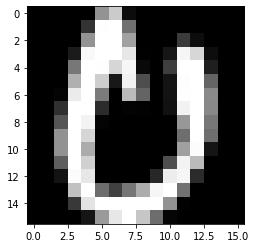

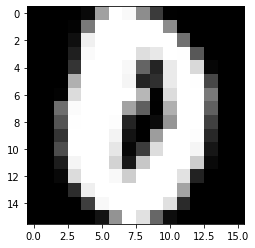

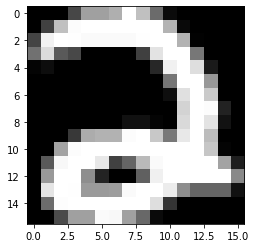

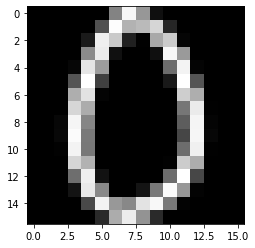

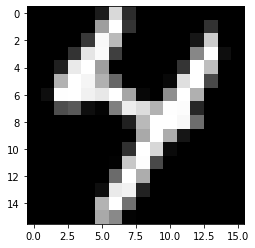

In [23]:
# Chargement et affichage des données USPS
dataxapp, datayapp = load_usps("data/USPS_train.txt")
dataxtrain, dataytrain = load_usps("data/USPS_test.txt")

# On affiche les dimensions des données
print("Les données sont de dimensions :", dataxapp.shape)

# On affiche la représentation image des données
for i in [np.random.randint(0, len(datayapp)) for _ in range(5)] :
    plt.figure() # Pour pouvoir affiche plusieurs images, sinon uniquement la dernière sera affichée
    show_usps(dataxapp[i])
    print("Classe de la donnée affichée dans l'ordre des images -", datayapp[i])

### **Mini-batch et descente stochastique**

On modifie désormais la fonction **fit** afin qu'elle puisse effectue la descente de gradient de différentes manières en fonction de notre choix. On ajoute alors un paramètre *mode*, étant par défaut sur "batch", allant nous permettre de choisir le mode que l'on souhaite utiliser pour l'apprentissage.

Les 3 valeurs de *mode* acceptées sont donc :
- "batch"
- "stoch"
- "mini"

On ajoute également un paramètre *part* dont la valeur ne sera utilisée que lors d'une descente de gradient en mode mini-batch, et sa valeur par défaut est de 10, ainsi que le pramètre *doPlot*, allant préciser si on souhaite un affichage de l'évolution de la loss, qui est par défaut à False.

Aayant déjà codé les différentes descentes de gradient pendant le TME 3, on utilise les fonctions présentes dans le fichier *tme3_for_tme4*.